# Implementing VAR Model

***

This code implements the vector autoregression (VAR) model using the `VAR` function from the `statsmodels` module.

Useful documentation can be found [here](https://www.statsmodels.org/dev/vector_ar.html).

One important note is that the data must be stationary to apply a VAR. Either the series themselves are stationary ("VAR in levels") or we take differences to make the data stationary ("VAR in differences"). [Source here.](https://otexts.com/fpp2/VAR.html)

***

## Steps

* **Step 1** Load modules and data.
* **Step 2** Test for stationarity and difference each series if necessary.
* **Step 3** Fit the model.
* **Step 4** Generate and evaluate forecasts.

***

#### Step 1 
Load Modules and Data

In [204]:
# load modules
import numpy as np
import pandas as pd
import pmdarima as pm
import statsmodels.api as sm
import statsmodels.tools.eval_measures as em
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import kpss
import matplotlib.pyplot as plt
import statistics

***

Calculating the number of estimated parameters.

Our example Y has 74 series. Each matrix of coefficients for a given lag length is 74x74 = 5476. Assume we also have a vector of 74 constants. This gives us 5476 + 74 = 5550 coefficients to estimate with 74x123 = 9102 datapoints.

***

In [205]:
# import weekly finance series, skipping column names
ts = pd.read_csv("../../../Data/Train/Clean/protected_m3_monthly_micro_h1_DP_0.1.csv")

In [206]:
# convert to a list of series, potentially with different lengths
full_data = [x.dropna() for _, x in ts.iterrows()]

In [286]:
full_forecasts=np.ndarray((1000,1000))

In [289]:
full_forecasts[ids[0],:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [276]:
474 - 29

445

In [307]:
ids = []
i=277
while i < 466:
    new_ids = np.arange(i, i+7).tolist()
    ids.append(new_ids)
    i += 7
ids.append(np.arange(466, 474))

In [282]:
np.arange(277, 445).reshape(-1, 28)

array([[277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289,
        290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302,
        303, 304],
       [305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317,
        318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330,
        331, 332],
       [333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345,
        346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358,
        359, 360],
       [361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373,
        374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386,
        387, 388],
       [389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401,
        402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414,
        415, 416],
       [417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429,
        430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
        443, 444]])

In [308]:
ids

[[277, 278, 279, 280, 281, 282, 283],
 [284, 285, 286, 287, 288, 289, 290],
 [291, 292, 293, 294, 295, 296, 297],
 [298, 299, 300, 301, 302, 303, 304],
 [305, 306, 307, 308, 309, 310, 311],
 [312, 313, 314, 315, 316, 317, 318],
 [319, 320, 321, 322, 323, 324, 325],
 [326, 327, 328, 329, 330, 331, 332],
 [333, 334, 335, 336, 337, 338, 339],
 [340, 341, 342, 343, 344, 345, 346],
 [347, 348, 349, 350, 351, 352, 353],
 [354, 355, 356, 357, 358, 359, 360],
 [361, 362, 363, 364, 365, 366, 367],
 [368, 369, 370, 371, 372, 373, 374],
 [375, 376, 377, 378, 379, 380, 381],
 [382, 383, 384, 385, 386, 387, 388],
 [389, 390, 391, 392, 393, 394, 395],
 [396, 397, 398, 399, 400, 401, 402],
 [403, 404, 405, 406, 407, 408, 409],
 [410, 411, 412, 413, 414, 415, 416],
 [417, 418, 419, 420, 421, 422, 423],
 [424, 425, 426, 427, 428, 429, 430],
 [431, 432, 433, 434, 435, 436, 437],
 [438, 439, 440, 441, 442, 443, 444],
 [445, 446, 447, 448, 449, 450, 451],
 [452, 453, 454, 455, 456, 457, 458],
 [459, 460, 

In [226]:
full_data[18:277]

[0    -20866.836946
 1     29797.783424
 2     85285.150523
 3    -24990.869621
 4       365.068415
           ...     
 62     7475.958612
 63     3230.607766
 64    84197.569654
 65   -81612.630867
 66   -84854.069154
 Name: 18, Length: 67, dtype: float64,
 0     -62228.879978
 1      30629.967967
 2      86474.250919
 3     118674.328190
 4      -1424.958782
           ...      
 62     78631.468305
 63     67563.665884
 64    440560.523152
 65    144289.274518
 66    224145.497903
 Name: 19, Length: 67, dtype: float64,
 0     284488.723311
 1     -44154.978093
 2     248040.782364
 3     -25099.876795
 4       5537.870844
           ...      
 62    -76838.800901
 63    -43068.712219
 64   -277143.788370
 65    -97140.578928
 66    -16037.244122
 Name: 20, Length: 67, dtype: float64,
 0    -110240.085374
 1    -187740.625291
 2    -139260.167261
 3    -646576.167146
 4     808789.815301
           ...      
 62    -57808.894504
 63    105357.950171
 64    -12556.287574
 65    22291

In [155]:
# select 5 series to model jointly

# forecast horizon
h = 1

Y = [x.iloc[:-h] for x in full_data]

Y = Y[400:410]

Test = [x.iloc[-h:] for x in full_data]

Test = Test[400:410]

Test = pd.DataFrame([x.reset_index(drop=True) for x in Test]).T

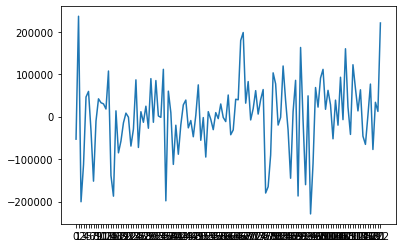

In [156]:
plt.plot(Y[0])
plt.show()

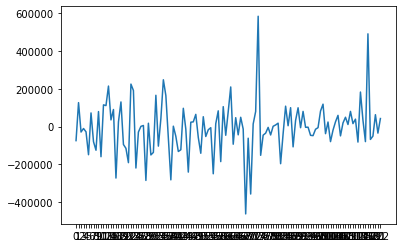

In [157]:
plt.plot(Y[1])
plt.show()

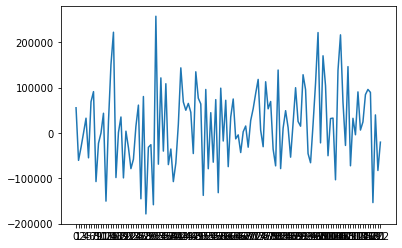

In [158]:
plt.plot(Y[2])
plt.show()

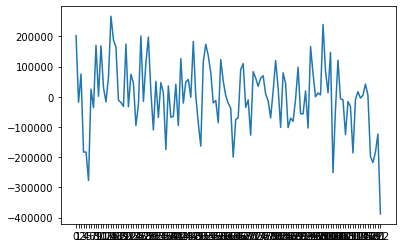

In [159]:
plt.plot(Y[3])
plt.show()

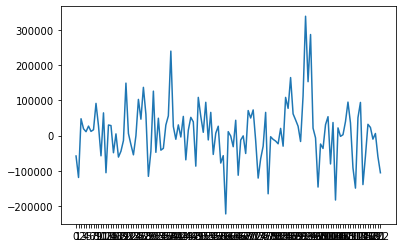

In [160]:
plt.plot(Y[4])
plt.show()

VAR models should be applied to stationary series, so we will perform differencing to achieve stationarity.

***

#### Step 2 
Test for stationarity and difference each series if necessary.

In [161]:
# array to store differenced training series
num_series = len(Y)
num_periods = len(Y[0])

diff_train = np.zeros([num_series, num_periods])

In [162]:
# store the number of differences for each series
d_vec = np.zeros([num_series], dtype = int)

# store starting values for reversing later
starting_vals = {}

for i, series in enumerate(Y):
    
    starting_vals[i] = [series[0]]
    
    # calculate the number of differences
    d = pm.arima.ndiffs(series, alpha = 0.05, test = 'kpss', max_d = 2)
    
    # store the number of differences for reversing later
    d_vec[i] = d
    
    # store starting values
    if d > 0:
        for j in range(d-1):
            starting_vals[i].append(pm.utils.diff(x = series, differences = j+1)[0])        
    
mode_d = statistics.mode(d_vec)
    
for i, series in enumerate(Y):
    
    if mode_d > 0:
        # difference the series
        diff_train[i,mode_d:] = pm.utils.diff(x = series, differences = mode_d)
    else:
        diff_train[i,mode_d:] = series

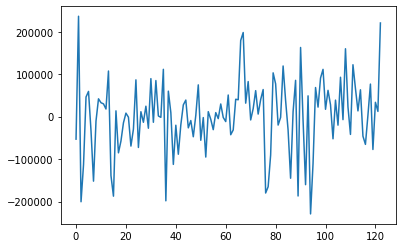

In [163]:
plt.plot(diff_train[0,:])
plt.show()

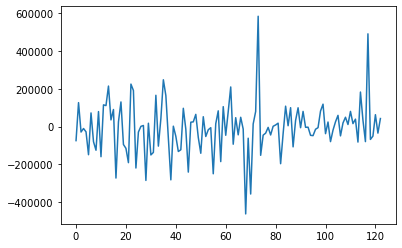

In [164]:
plt.plot(diff_train[1,:])
plt.show()

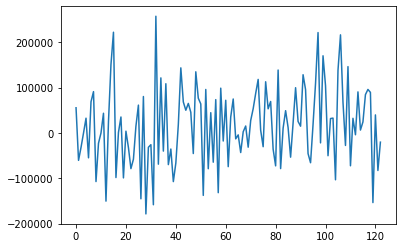

In [165]:
plt.plot(diff_train[2,:])
plt.show()

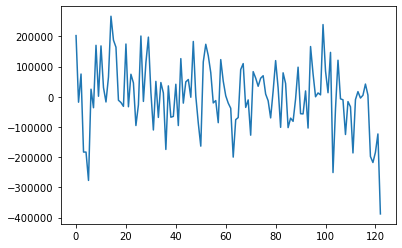

In [166]:
plt.plot(diff_train[3,:])
plt.show()

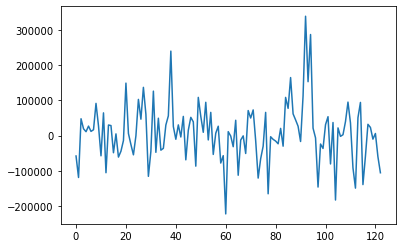

In [167]:
plt.plot(diff_train[4,:])
plt.show()

In [168]:
# find how many periods were differenced out for all series
num_d = 0
for i in range(2):
    if sum(diff_train[:,i]) == 0:
        num_d += 1

***

#### Step 3 
Fit the model.

The `VAR` function assumes a $T x K$ multivariate time series.

In [169]:
num_d

0

In [170]:
dt = diff_train[:,num_d:]

In [171]:
# transpose data matrix
dt = dt.T

In [172]:
# instantiate model
var_model = VAR(dt)

In [173]:
dt.shape

(123, 10)

In [182]:
var_results = var_model.fit(maxlags = 2, ic = 'aic')

In [183]:
var_results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 09, Jun, 2022
Time:                     15:49:11
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                    221.763
Nobs:                     123.000    HQIC:                   221.627
Log likelihood:          -15359.6    FPE:                1.62551e+96
AIC:                      221.534    Det(Omega_mle):     1.49908e+96
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const      2700.189196      7767.821434            0.348           0.728

Results for equation y2
           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------

***

#### Step 4 
Generate and evaluate forecasts.

In [176]:
# number of lags in VAR model
lag_order = var_results.k_ar

In [185]:
# forecast nfs steps ahead using lag_order prior values
predictions = var_results.forecast(np.ones((10,1)), h)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [54]:
# add predictions to training data and transpose back
full_data = np.concatenate([diff_train.T, predictions], axis = 0).T
# convert to 'C' order so that diff_inv function will work
full_data = full_data.copy(order = 'C')

In [306]:
197 - 27*7

8

In [299]:
7*28 + 7

203

In [198]:
456/24

19.0

In [56]:
# reversing the differencing
for i, series in enumerate(full_data):
    
    for j in range(d_vec[i], 0, -1):
        
        # place the starting value for the series
        series[j-1] = starting_vals[i][j-1]
        
        # reverse one difference
        series = pm.utils.diff_inv(series, differences = 1)[1:]
        
    full_data[i,:] = series

In [57]:
predictions = full_data[:,-h:]

In [59]:
# calculate root mean squared error and mean absolute error
# for predictions from all series

# empty arrays for errors
rmse = np.zeros(5)
mae = np.zeros(5)

for i in range(5):
    rmse[i] = em.rmse(Test.iloc[:,i], predictions[i,:])
    mae[i] = em.meanabs(Test.iloc[:,i], predictions[i,:])

In [60]:
# average root mean squared error across series
np.mean(rmse)

1031.374292111033

In [61]:
# average mean absolute error across series
np.mean(mae)

1031.374292111033

In [62]:
plt.plot(test[0,:], label = "Actual")
plt.plot(predictions[0,:], label = "Predicted")
plt.legend()
plt.show()

NameError: name 'test' is not defined

In [ ]:
plt.plot(test[1,:], label = "Actual")
plt.plot(predictions[1,:], label = "Predicted")
plt.legend()
plt.show()

In [ ]:
plt.plot(test[2,:], label = "Actual")
plt.plot(predictions[2,:], label = "Predicted")
plt.legend()
plt.show()

In [ ]:
plt.plot(test[3,:], label = "Actual")
plt.plot(predictions[3,:], label = "Predicted")
plt.legend()
plt.show()

In [ ]:
plt.plot(test[4,:], label = "Actual")
plt.plot(predictions[4,:], label = "Predicted")
plt.legend()
plt.show()